#Regression 
## The Elements of Machine Learning

### Objectives
 

## Important Note
* 

* 

* 

### Model Selection


__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in the sence that it finds the K nearest neighbors and estimates the label of the given test point based on the labels of its nearest neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ labels. 

#### Question 1 [KNN Regressor] 
Q1-1) Implement the KNN regressor function:
                                     `knn(train.data, train.label, test.data, K=3)` 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (`K`). It will return the regressed values for the test data points. When choosing the neighbors, the Euclidean distance function will measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

Plotting he training and the testing errors versus `1/K` for `K=1,..,20` in one plot, using the Task1A_train.csv and Task1A_test.csv datasets. Discussed the findings.

 Reporting the best value for K in terms of the testing error. Discussing the values of K corresponding to underfitting and overfitting based on the plot. 

####  [K-fold Cross Validation] 
Implementing a K-fold Cross Validation (CV) function for KNN regressor:  
       `cv(train.data, train.label, numFold=10)` 
which takes the training data and their labels (continuous values), the number of folds, and returns RMSE for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

Using the training data, running the K-fold CV where the `numFold` is set to 10. Change the value of `K=1,..,20` and for each K compute the average `10` RMSE values you have got.  Plot the average error numbers versus `1/K` for `K=1,..,20`. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Included the plot in the report. 

 Reporting the values of K that results the minimum average RMSE and minimum standard deviation of RMSE based on cross validation plot.

## Question 1 [KNN Regressor] 

loaded the R libraries required.

In [10]:
library(ggplot2) # For plotting
library(reshape2) # For ...
#...

### Q1-1 Implement the KNN regressor

We define a function to calculate the mean value of the K nearest neighbours based on a distance matrix. And a function to calculate the root mean square error (RMSE).

In [11]:
knn <- function(train.data, train.label, test.data, K=3){
    
    distance = 'euclidean'
    
    ## count number of train samples
    train.len <- nrow(train.data)
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # Pre-allocate vector and matrices if needed (optional)
    # eg. for the best performance, find the distance between any pair of test and train set...
    # and sort the index of train.data based on their distances to each test.data sample 
    
    
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i,1]<- (mean(train.label[nn,1]))
    }
    
    
    # Return the mean value as output
    return (test.label)
    
}


rmse <- function(real.value, estimated.value) {
    #print(real.value)
    #print(estimated.value)
    merged = merge(real.value, estimated.value, by=0, all=TRUE)
    
    
    names(merged)[1]<-paste("id")
    names(merged)[2]<-paste("realY")
    names(merged)[3]<-paste("estimatedY")
    
    
    #print (merged)
    
    
    sum = 0
    for (row in 1:nrow(merged)) {
        realY <- merged[row, "realY"]
        estimatedY <- merged[row, "estimatedY"]
        sum = sum + (as.numeric(realY)-as.numeric(estimatedY))^2
    }
    
      
    return (sqrt(sum/nrow(real.value)))
   
}

### Q1-2 Plot training and testing errors v.s. 1/K

We load the data, then separate the predictors (train.data and test.data) from the target values (train.value and test.value) for input to the knn regressor function.

In [12]:
# Load the data
train <- read.csv("../Task1A_train.csv")
test <- read.csv("../Task1A_test.csv")

train.len <- nrow(train)
test.len <- nrow(test)

set.seed(1234)
# permute iris, shuffle or mix them up
train <- train[sample(1:train.len,train.len),]
test <- test[sample(1:test.len,test.len),]

# Split dependent and independent attributes
train.data <- train[-2] 
train.label <- train[2]

test.data <- test[-2] 
test.label <- test[2]

#knn(train.data, train.label, train.data)
#print(train.label)




We calculate the train and test RMSE's for K in 1:20.

In [13]:
# Initiate a dataframe to record RMSE

error <- data.frame('K'=1:20, 'TrainRMSE'=0, 'TestRMSE'=0)
# calculating rmse... 
for (k in 1:20) {
    
    # training rmse
    error[k, 'TrainRMSE'] = rmse(train.label, knn(train.data, train.label, train.data,k))
        
    # testing rmse
    error[k, 'TestRMSE'] = rmse(test.label, knn(train.data, train.label, test.data,k))
        
}
print(error)

    K TrainRMSE  TestRMSE
1   1  6.271213 1.3077735
2   2  6.237216 1.4583110
3   3  6.275469 1.4833810
4   4  6.198652 1.3611987
5   5  6.175907 1.2097320
6   6  6.146908 1.2136546
7   7  6.052715 1.1607414
8   8  6.018017 1.0847818
9   9  5.908772 0.9852899
10 10  5.846891 1.0227636
11 11  5.761047 1.1021143
12 12  5.695465 1.0531665
13 13  5.656610 1.0632460
14 14  5.614997 1.1309280
15 15  5.557916 1.1477268
16 16  5.494408 1.2391697
17 17  5.442415 1.2979300
18 18  5.376010 1.3585587
19 19  5.321495 1.4377983
20 20  5.264472 1.5089615


We plot the training and testing errors.

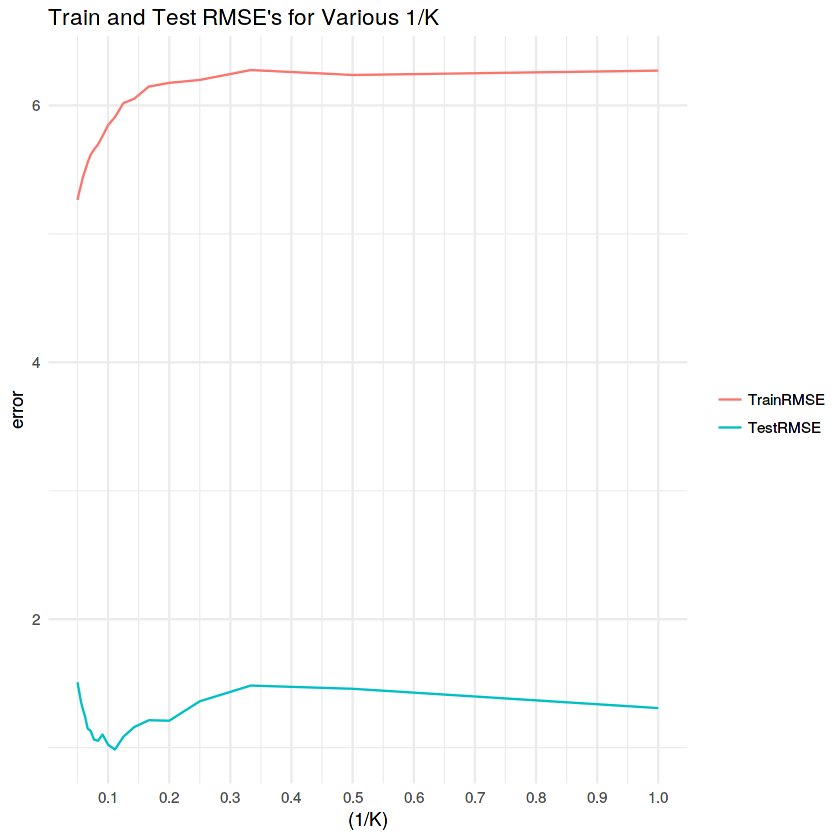

In [14]:
# Reshape if needed
error.m = melt(error, id="K")
names(error.m) <- c('K', 'type', 'error')

# Plot
ggplot(data=error.m, aes(x=(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various 1/K")

### Q1-3 Report the best K

As we can see in the plot above and the table, that K is optimum at a value of 9. Which is why 1/K shows the minimum errors at 0.1 and nearby. From this, we can conclude that the optumum value for K would be 9.

## Question 2 [K-fold Cross Validation]

### Q2-1 Implement a K-fold cross validation

We define a function to segment a dataset into a given number of folds for K-fold cross validation to determine the most suitable value for the number of nearest neighbours K considering all the folds.

In [6]:
cv <- function (train.data, train.label, num.fold=10, K=3){
    # Initiate a dataframe to record RMSE
    rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'RMSE'=rep(0, L * K))
    
    dev.size = floor(nrow(train.data) / L) # number of samples reserved for validation
    # notice that since the sample size may not be a multiple of 10!
    
    for (l in 1:num.fold) {
        dev.indices = ...
        train.indices = ...
        ...
        
        # for each value of k...
        for (k in 1:K) {
            ...
            rmse.df[...,... ] = rmse(knn(...), ...)
        }
    ...
    }
    ...
    return(rmse.df)
}

In [7]:
K <- 20 # maximum number of nearest neighbours
L <- 10 # number of folds in cross validation
...

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


### Q2-2 Plot RMSE v.s. 1/K

In [ ]:
# Plot the RMSE vs 1/K
...

ggplot(data=..., aes(x=1/K, y=...)) + geom_line() +
       geom_line(data = ..., aes(x=1/K, y=...), linetype="dashed") +
       geom_line(data = ..., aes(x=1/K, y=...), linetype="dashed") +
       ggtitle("Mean RMSE +- sd v.s. 1/K")

### Q2-3 Report the best K

The trend of the above curve shows ...

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Applied the bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.  

how the test error and its uncertainty behave as `K` increases? 

Loading`Task1B_train.csv` and `Task1B_test.csv` sets. Applied bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  

how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

## Question 3 [Bootstrapping] 

### Q3-1 Implement KNN regression with bootstrapping

We define a function that randomly sample row indices with replacement from a given dataset.

In [15]:
boot <- function (original.size=100, sample.size=10, times=100){
    
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
        
    }   
    return(indx)    
}

We load the data, then separate the predictors from the target values for input to the knn regressor function.

In [16]:
# Load the datasets

train <- read.csv("../Task1B_train.csv")
test <- read.csv("../Task1B_test.csv")

train.len <- nrow(train)
test.len <- nrow(test)

set.seed(1234)
# permute iris, shuffle or mix them up
train <- train[sample(1:train.len,train.len),]
test <- test[sample(1:test.len,test.len),]

# Split dependent and independent attributes
train.data <- train[-5] 
train.label <- train[5]

test.data <- test[-5] 
test.label <- test[5]


# just to see if it works!
boot(100, 10, 5)

43,94,84,92,30,77,16,32,78,78
68,40,12,51,98,73,94,53,9,66
99,79,5,17,55,31,13,26,36,17
37,21,63,86,14,72,1,69,47,82
23,54,59,78,20,45,79,87,52,90


Now we perform the bootstrapping

In [26]:
# This is the KNN classifer

# define a function that calculates the majority votes (or mode!)
majority <- function(x) {
   uniqx <- unique(x)
   uniqx[which.max(tabulate(match(x, uniqx)))]
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test.label[i]<- (majority(train.label[nn]))
    }
    return (test.label)
}

K <- 20             # Maximum K for KNN
L <- 100            # Number of bootstrapped samples
N <- 25             # Size of bootstrapped samples


# generate bootstrap indices:
boot.indx <- boot(nrow(train.data),N, L)
print (boot.indx)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))
#miss <- data.frame('L'=1:L, 'K'=1:K, 'test'=rep(0,L*K))
#print(miss)

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  (sum(knn(train.data[indx,], train.label[indx,], test.data[indx,], K=k)  != test.label[indx,])/nrow(test.data))*100
        #miss[i,'test'] <-  rmse(test.label[indx,], knn(train.data[indx,], train.label[indx,], train.data[indx,],k))
    } 
}

#print(miss)

       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]  771  707   81  159   31  174  271   70  211   599   655   862   916
  [2,]  290  916   80  427  184  548  869  479  130   440   730   778   843
  [3,]  692  716  894   61  818  883  224  686  664   182   482    49   353
  [4,]  335  873  572  612  922  383  389  372  587    55   869    60   691
  [5,]  291  299  458  515  532  656  608  647  441   645   859   493   570
  [6,]  151  885   81  362  197  795  804   83  782   770    23   655   683
  [7,]  288  138  157  141  178  743  789   14  697   481   404   510   468
  [8,]  858  155   80  816   20  269  558  883  370   488   199   168   123
  [9,]  202  877  601  442  337  291  507  472  538   359   687   707   542
 [10,]  871   96   54  708  890  374  685  551  548    60     6   853   208
 [11,]  817  715  891  571  304   47  128  559   24   422   271   761   105
 [12,]  743  293  533  112  646  911  438    7  423    47   107   134   218
 [13,]  826 

### Q3-2 Plot bootstrapping KNN regression for different number of nearest neighbours

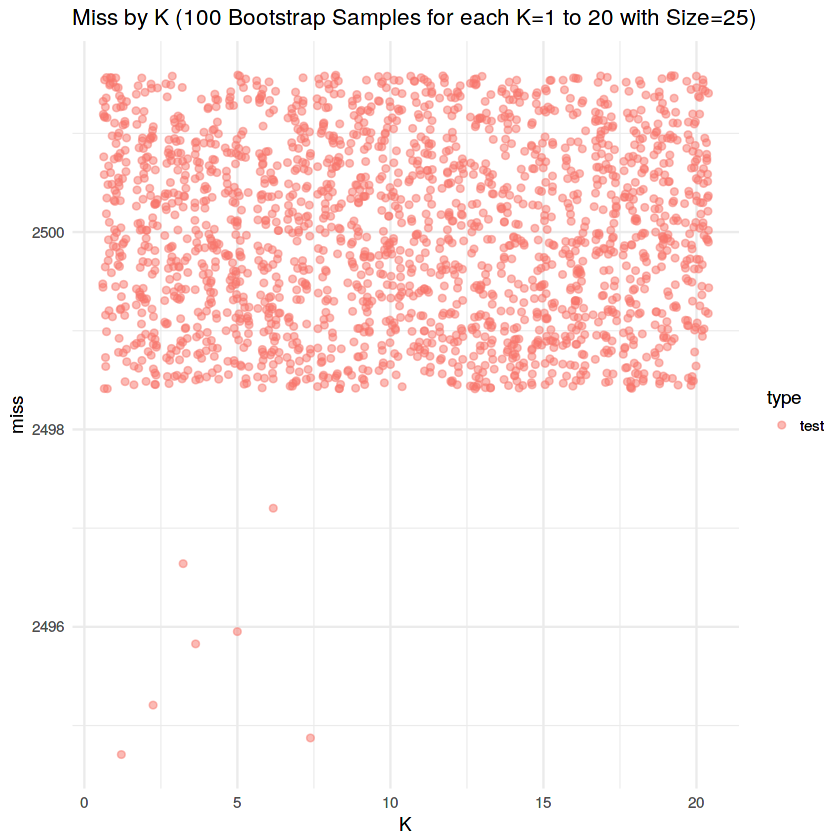

In [27]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')
#print (miss.m)
ggplot(data=miss.m, aes(x=K, miss, color=type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Miss by K (100 Bootstrap Samples for each K=1 to 20 with Size=25)') + theme_minimal() 


### Q3-3 Results interpretation

In the above Jitter Plot, each point corrspends to the error (measured on the fixed test set) of the KNN classifier trained by a random training sample generated during our bootstrap sampling.

### Q3-4 Plot bootstrapping KNN regression for different number of bootstrapped datasets

In [29]:
K <- 5             # Maximum K for KNN
L <- 200            # Number of bootstrapped samples
N <- 25             # Size of bootstrapped samples


# generate bootstrap indices:
boot.indx <- boot(nrow(train.data),N, L)
print (boot.indx)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))
#miss <- data.frame('L'=1:L, 'K'=1:K, 'test'=rep(0,L*K))
#print(miss)

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  (sum(knn(train.data[indx,], train.label[indx,], test.data[indx,], K=k)  != test.label[indx,])/nrow(test.data))*100
        
}

#print(miss)

       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]  829  642  410  704  791  911   35  313   63   664   800   831   179
  [2,]  153  430  300  188  825  621  404   28  864   277   668   493   720
  [3,]  613  855  408   38  726  903  264  328  166   360   892   211   598
  [4,]  714  657  728  692  550   19  305   33  438   235   211   698   457
  [5,]  580  548  166  783  553  206  564  351  172   555   249   465   703
  [6,]   53  110  637  676  743  457  763  554   52   182   788   185   132
  [7,]  378  647  774  364  907  697  525  719  451   515   786   374   193
  [8,]  824  313   12  818  112  563  318  798  643    50   903    17   755
  [9,]  158  796  775  177   29   57  417  586  561   135   900   480   206
 [10,]  710  664  125  603  442  216  810  406  852    92    27   588   164
 [11,]  555  567  304  310  582  822   61  226  520   748    40   244   472
 [12,]  676   82  439  154  893  579  413  289  750   593   104   894   770
 [13,]  677 

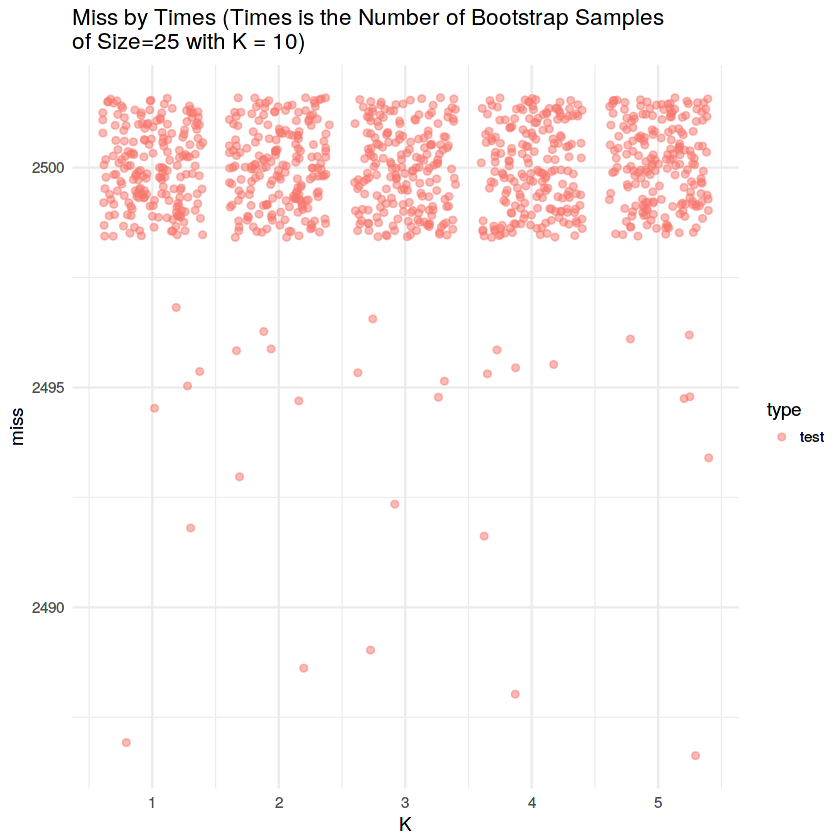

In [32]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')
#print (miss.m)
ggplot(data=miss.m, aes(x=K, miss, color=type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Miss by Times (Times is the Number of Bootstrap Samples\nof Size=25 with K = 10)') + theme_minimal() 

### Q3-3 Results interpretation

In the above Jitter Plot, each point corrspends to the error (measured on the fixed test set) of the KNN classifier trained by a random training sample generated during our bootstrap sampling.

### Probabilistic Machine Learning


#### Question 4 [Bayes Rule] 
 Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

The chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

## Question 4 [Bayes Rule] 

Then the probability of selecting an apple is just the fraction of apples in the blue
box which is 3/4, and so p(F = a|B = b)=3/4

According to Bayes rule:
P(Box = blue| Fruit = apple) = P(Fruit = apple| Box = blue)P(Box = blue)/ P(Fruit=appple)
                             = (3/4 * 6/10)/ ( 1/4* 4/10 + 3/4*6/10)
                             = 3/4 * 6/10 * 20/11
                             = .81

In [8]:
p_red = 0.40
p_blue = 0.60
p_apple = .55
p_orange = .45

p_blue_given_apple = .75*.6*1.81
print(p_blue_given_apple)

[1] 0.8145


In the above solution the probabilty of selecting an apple is just the fraction of apples in the blue box 81%